In [4]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.optimize import curve_fit
from scipy.integrate import trapz, quad
from scipy.stats import norm, lognorm, uniform
from scipy.interpolate import interp1d

##  Values from Knopf et al. 2020
Particularly from Figure 1

In [2]:
# useful functions

def seconds_to_min(t):
    '''Convert second value to minute value'''
    return t / 60

In [5]:
# Constants

J_het = 75 # [cm^-2s^-1]
N = 300 # Number of droplets
mean_area = 1E-4 # [cm^2]
frac = np.linspace(1, 0, N)

In [8]:
# Frozen fraction for isothermal homogeneous droplets

# Generate N random numbers in [0,1) which are random points on the liquid proportion curve
x = np.random.random(N)
# Convert them to freezing times my mapping them onto the liquid proportion curve
homo_freeze_times = -np.log(x)/(mean_area * J_het)
# Sort them into time order
homo_freeze_times.sort()

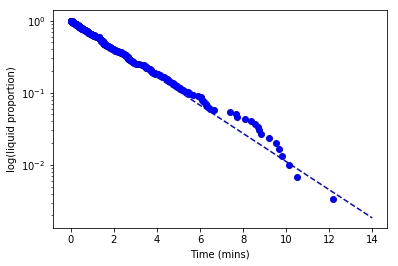

In [11]:
# Plot the simulated droplets and the liquid proportion curve they are based on

analytic_times = np.linspace(0, 14*60, 1000) # [s] 14 minutes
plt.plot(seconds_to_min(analytic_times),
        np.exp(-J_het * mean_area * analytic_times),
        'b--')

plt.scatter(seconds_to_min(homo_freeze_times),
           frac,
           color='b')
plt.yscale('log')

plt.ylabel('log(liquid proportion)')
plt.xlabel('Time (mins)')
plt.show()

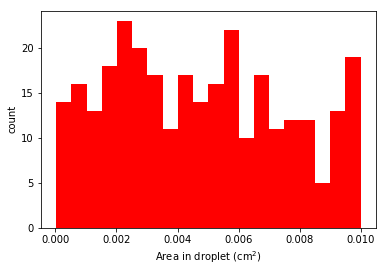

Total area 1.41cm squared


In [27]:
# Now assume a uniform distribution of areas in the range 2 orders of magnitude around the mean area above
lower, upper = 1E-6, 1E-2
# Generate the random areas
uniform_areas = (upper - lower) * np.random.random(N) + lower
# Histogram the areas to show they are correct
plt.hist(uniform_areas, 20, color='red')
plt.ylabel('count')
plt.xlabel('Area in droplet (cm$^2$)')

plt.show()
print(f'Total area {sum(uniform_areas):.2f}cm squared')

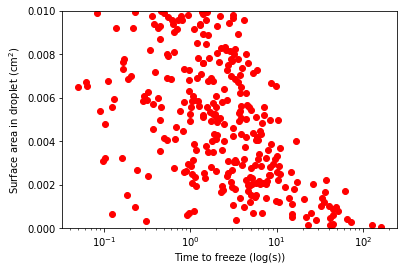

The graph shows the correct correlation that droplets with more surface area freeze earlier


In [32]:
# Simulate N droplets with the areas above in them. 
# Again generate N random numbers in [0,1) to be random points on the liquid proportion curve
x = np.random.random(N)
# And now convert them to freezing times, but from the liquid proportion curve for the specific area
uniform_freeze_times = -np.log(x)/(uniform_areas * J_het)
# Put the freezing time together with the area in the droplet
uniform_data = np.c_[uniform_areas, uniform_freeze_times]
# Now sort them by time, maintaining the same area with them
uniform_data = uniform_data[uniform_data[:,1].argsort()]

# Now plot the freeze time against the surface area present
plt.ylim((lower, upper))
plt.xscale('log')
plt.scatter(uniform_data[:,1], uniform_data[:,0], color='r')

plt.ylabel('Surface area in droplet (cm$^2$)')
plt.xlabel('Time to freeze (log(s))')
plt.show()

print('The graph shows the correct correlation that droplets with more surface area freeze earlier')

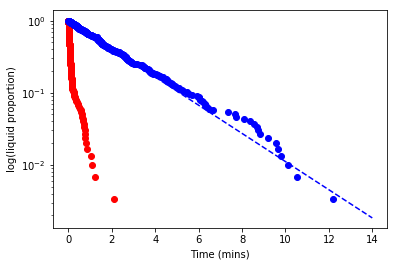

In [36]:
# Now plotting the liquid proportion curve to compare to the homogeneous case

plt.scatter(seconds_to_min(uniform_data[:,1]),
           frac,
           color='red')

plt.scatter(seconds_to_min(homo_freeze_times),
           frac,
           color='blue')

plt.plot(seconds_to_min(analytic_times),
        np.exp(-J_het * mean_area * analytic_times),
        'b--')

plt.yscale('log')
plt.ylabel('log(liquid proportion)')
plt.xlabel('Time (mins)')

plt.show()
